# Generating Visualizations

Below is the code we used to generate all the visualizations in our Powerpoint. It is a mix of exploratory visualizations as well as visualizations we used to compare our model to the Vegas model and the FiveThirtyEight model.

In [1]:
#short list of packages we'll be using
packages <- c("ggplot2","RColorBrewer","ggthemes","gridExtra","lubridate","tidyr","plyr","dplyr","reshape2","dummies","caTools","rpart","rpart.plot","rattle")

#install packages if they aren't already installed
#then load the packages
for (package in packages){
    if(!require(package,character.only=TRUE)) install.packages(package,character.only=TRUE)
    library(package,character.only=TRUE,quietly=TRUE)
}

Loading required package: ggplot2
Loading required package: RColorBrewer
Loading required package: ggthemes
Loading required package: gridExtra
Loading required package: lubridate

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Loading required package: tidyr
Loading required package: plyr

Attaching package: ‘plyr’

The following object is masked from ‘package:lubridate’:

    here

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union

The following object is masked from ‘package:gridExtra’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: reshape2



In [2]:
#load data
df <- read.csv("data_prep_output.csv",header=TRUE)
head(df)

X,schedule_date,schedule_season,home_team_id,away_team_id,home_score,away_score,team_favorite_id,spread_favorite,home_team_elo,away_team_elo,home_team_win_prob
1,2002-09-05,2002,NYG,SF,13,16,SF,-4.0,1485.669,1561.242,0.4847889
2,2002-09-08,2002,BUF,NYJ,31,37,NYJ,-3.0,1413.251,1535.438,0.4184365
3,2002-09-08,2002,CAR,BAL,10,7,PICK,0.0,1370.952,1572.940,0.3124766
4,2002-09-08,2002,CHI,MIN,27,23,CHI,-4.5,1565.787,1452.964,0.7356794
5,2002-09-08,2002,CIN,LAC,6,34,CIN,-3.0,1417.743,1407.844,0.6061490
6,2002-09-08,2002,CLE,KC,39,40,CLE,-2.0,1446.242,1475.100,0.5518257


In [3]:
#convert team ids from factors to strings
df$home_team_id <- as.character(df$home_team_id)
df$away_team_id <- as.character(df$away_team_id)
df$team_favorite_id <- as.character(df$team_favorite_id)

#create elo_diff column
df$elo_diff = df$home_team_elo - df$away_team_elo

#create a column for betting_pred
df$betting_pred <- ifelse(df$home_score > df$away_score & df$team_favorite_id == df$home_team_id, 1, 
                                   ifelse(df$home_score < df$away_score & df$team_favorite_id == df$away_team_id, 1, 0))

#create a column for elo_pred
df$elo_pred <- ifelse(df$home_score > df$away_score & df$home_team_elo > df$away_team_elo, 1, 
                                   ifelse(df$home_score < df$away_score & df$home_team_elo < df$away_team_elo, 1, 0))

head(df)

X,schedule_date,schedule_season,home_team_id,away_team_id,home_score,away_score,team_favorite_id,spread_favorite,home_team_elo,away_team_elo,home_team_win_prob,elo_diff,betting_pred,elo_pred
1,2002-09-05,2002,NYG,SF,13,16,SF,-4.0,1485.669,1561.242,0.4847889,-75.573,1,1
2,2002-09-08,2002,BUF,NYJ,31,37,NYJ,-3.0,1413.251,1535.438,0.4184365,-122.187,1,1
3,2002-09-08,2002,CAR,BAL,10,7,PICK,0.0,1370.952,1572.940,0.3124766,-201.988,0,0
4,2002-09-08,2002,CHI,MIN,27,23,CHI,-4.5,1565.787,1452.964,0.7356794,112.823,1,1
5,2002-09-08,2002,CIN,LAC,6,34,CIN,-3.0,1417.743,1407.844,0.6061490,9.899,0,0
6,2002-09-08,2002,CLE,KC,39,40,CLE,-2.0,1446.242,1475.100,0.5518257,-28.858,0,1


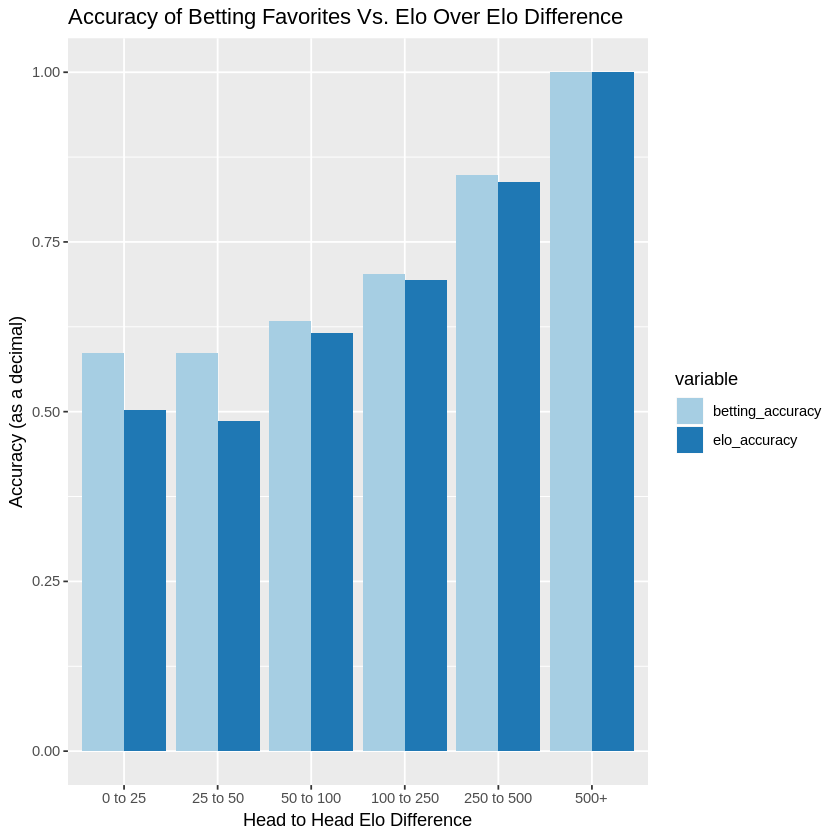

In [4]:
df$elo_diff_cat <- cut(abs(df$elo_diff),
                              breaks = c(0,25,50,100,250,500,max(abs(df$elo_diff))),
                              labels = c("0 to 25","25 to 50","50 to 100","100 to 250", "250 to 500","500+"),
                              ordered_result = TRUE)

accuracy_over_elodiff <- df %>%
    group_by(elo_diff_cat) %>%
    summarize(betting_accuracy = sum(betting_pred)/n(), elo_accuracy = sum(elo_pred)/n())

melted <- melt(accuracy_over_elodiff,id.vars="elo_diff_cat")

accuracy_plot <- ggplot(melted, aes(x=elo_diff_cat,y=value,fill=variable)) +
                    geom_bar(stat="identity",position=position_dodge()) +
                    scale_y_continuous(limits=c(0,1)) +
                    ggtitle("Accuracy of Betting Favorites Vs. Elo Over Elo Difference") +
                    ylab("Accuracy (as a decimal)") +
                    xlab("Head to Head Elo Difference") +
                    scale_fill_brewer(type="qual",palette=3)
                    
accuracy_plot

In [5]:
#load data for model evaluation visualizations
df2 <- read.csv("elo_results_summary.csv",header=TRUE)
head(df2)

Total,Average,Seasons_Won,Model
15830,931,10.5,Group 8
15020,883,5.5,Vegas
13982,822,1.0,FiveThirtyEight


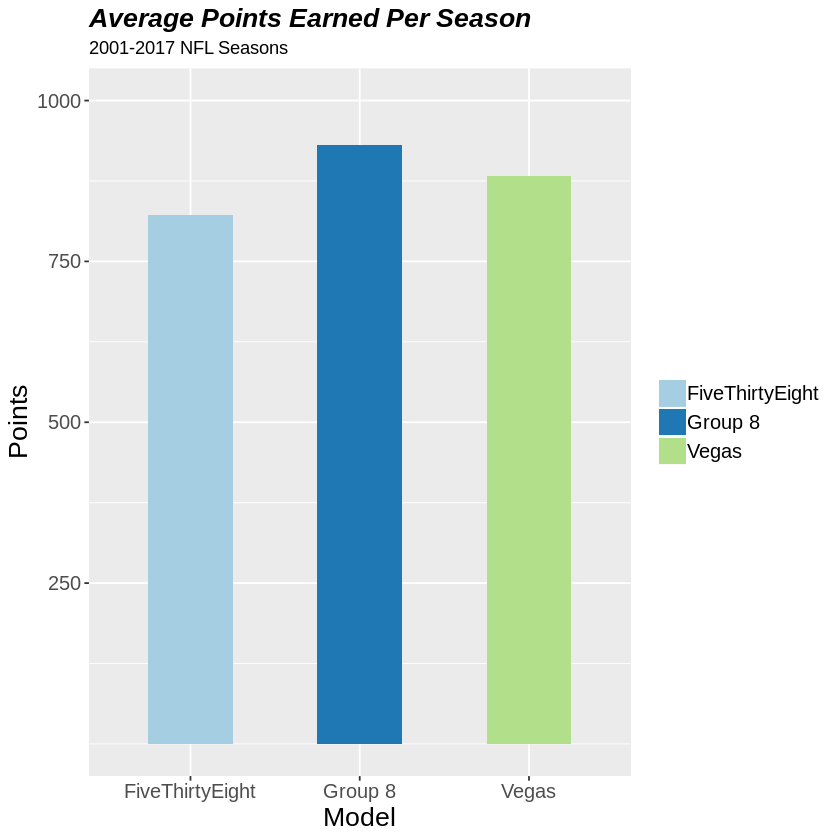

In [7]:
ggplot(df2, aes(x=Model,y=Average, fill=Model)) +
    geom_bar(stat="identity", width = .5) +
    ylab("Points") + 
    xlab("Model") +
    labs(title = "Average Points Earned Per Season", subtitle = "2001-2017 NFL Seasons") +
    theme(legend.title=element_blank()) +
    theme(legend.text = element_text(colour="black", size = 12)) +
    theme(plot.title = element_text(size=16, face="bold.italic"), axis.title.x = element_text(size=16), axis.title.y = element_text(size=16)) +
    scale_y_continuous(breaks = c(250, 500, 750, 1000), limits = c(0, 1000)) +
    theme(axis.text.x = element_text(size=12),
          axis.text.y = element_text(size=12)) +
    scale_fill_brewer(type="qual", palette=3)

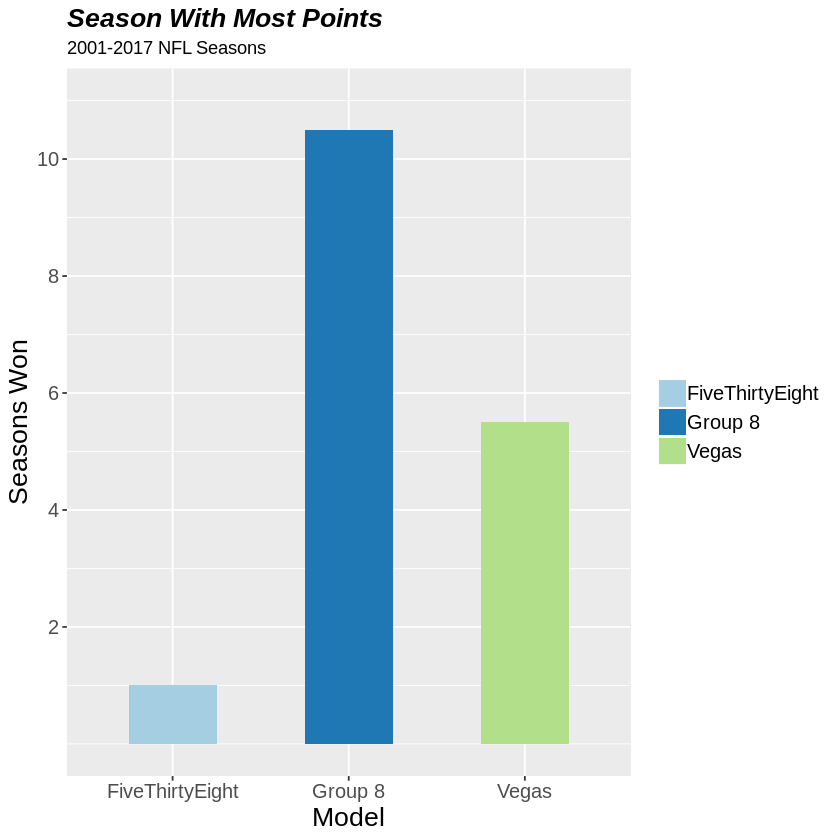

In [8]:
ggplot(df2, aes(x=Model,y=Seasons_Won, fill=Model)) +
    geom_bar(stat="identity", width = .5) +
    ylab("Seasons Won") + 
    xlab("Model") +
    labs(title = "Season With Most Points", subtitle = "2001-2017 NFL Seasons") +
    theme(legend.title=element_blank()) +
    theme(legend.text = element_text(colour="black", size = 12)) +
    theme(plot.title = element_text(size=16, face="bold.italic"), axis.title.x = element_text(size=16), axis.title.y = element_text(size=16)) +
    scale_y_continuous(breaks = c(2, 4, 6, 8, 10), limits = c(0, 11)) +
    theme(axis.text.x = element_text(size=12),
          axis.text.y = element_text(size=12)) +
    scale_fill_brewer(type="qual", palette=3)